In [48]:
import pandas as pd
df=pd.read_csv("/Users/masixin/Documents/msfe/ie598/housing2.csv")
df = df.dropna()
df.head()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.038327,0.592379,0.655174,0.119839,0.652477,0.984323,0.206738,0.374650,0.463350,0.333610,...,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.225022,0.983103,0.803619,0.836315,0.163104,0.637497,0.008760,0.631190,0.207978,0.880357,...,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.423233,0.375808,0.271293,0.729824,0.886744,0.043703,0.457700,0.862450,0.901924,0.062488,...,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.743370,0.929103,0.589894,0.644012,0.110490,0.774604,0.306483,0.880599,0.630401,0.928894,...,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.378623,0.786609,0.712752,0.110274,0.762133,0.030069,0.316631,0.667073,0.426443,0.400557,...,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/masixin/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


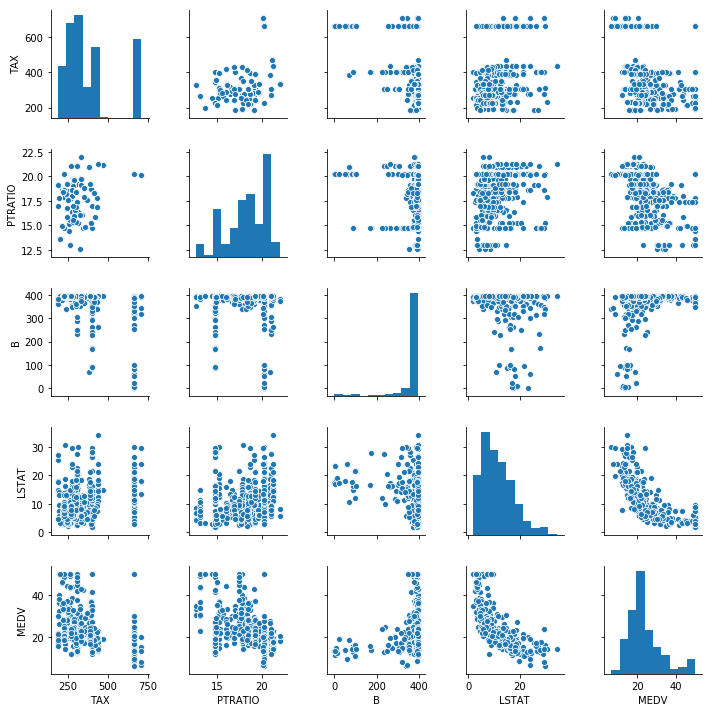

In [50]:
sns.pairplot(df.iloc[:,-5:],size=2)
plt.tight_layout()
plt.show()

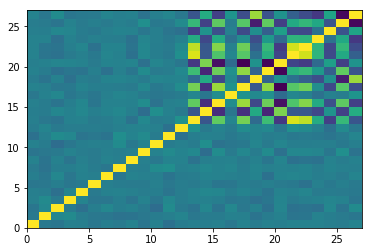

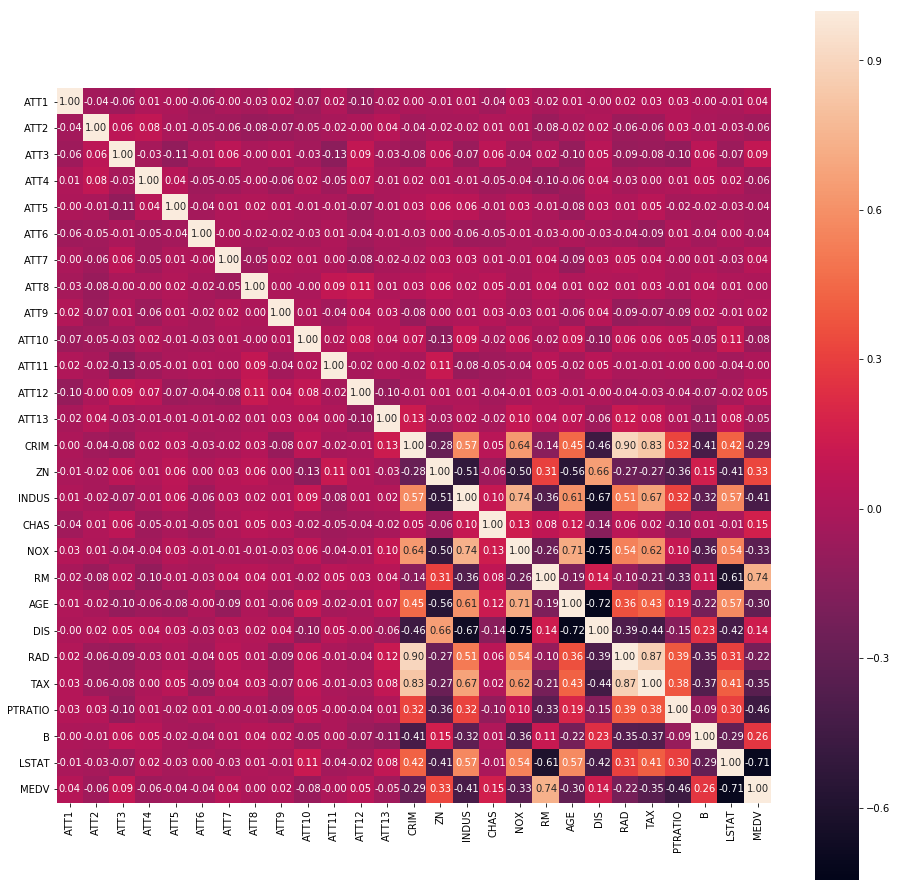

In [51]:
from pandas import DataFrame
corMat=DataFrame(df.corr())
plt.pcolor(corMat)
plt.show()
plt.figure(figsize=(16,16))
sns.heatmap(corMat,cbar=True, annot=True, square=True,
            fmt='.2f',annot_kws={'size':10})
plt.show()

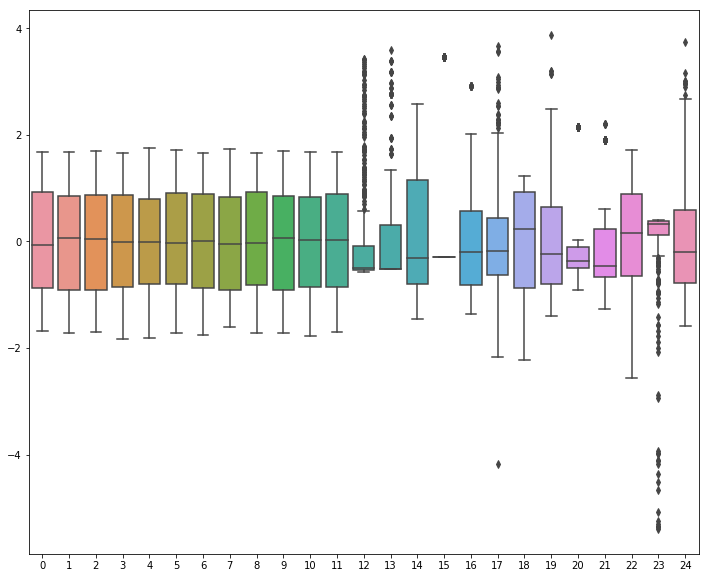

In [52]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
standscaler = StandardScaler()
standscaler.fit(X)
X_processed = standscaler.transform(X)
plt.figure(figsize = (12,10))
sns.boxplot(data = X_processed)

23.818245528577044


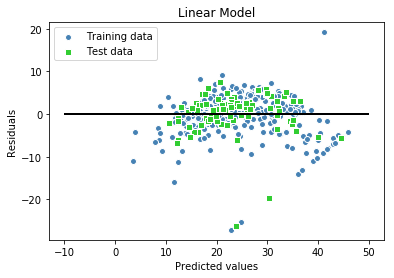

MSE train: 19.466, test: 21.594
R^2 train: 0.755, test: 0.689


In [71]:
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y,
                                                    test_size=0.2,
                                                    random_state=42)
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
slr = LinearRegression()
slr.fit(X_train,y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print(slr.intercept_)

plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', 
            edgecolor='white', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', 
            edgecolor='white', label='Test data')
plt.title('Linear Model')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.show()

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                                       mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),
                                      r2_score(y_test, y_test_pred)))


In [69]:
#ridge regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error as MSE
from sklearn import metrics
alpha = range(1,100,1)
ridge_df = pd.DataFrame()
ridge_r2 = {}
ridge_MSE = {}
for i in range(len(alpha)):
    ridge = Ridge(alpha=alpha[i])
    ridge.fit(X_train, y_train)
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    
    ridge_df[float(alpha[i])] = ridge.coef_
    ridge_r2[float(alpha[i])] = ridge.score(X_train,y_train)
    ridge_MSE[float(alpha[i])] = np.sqrt(MSE(y_test,y_test_pred))

ridge_df = ridge_df.transpose()

In [55]:
# Plot the R^2 and MSE of Ridge
X_R2 = list(ridge_r2.keys())
y_R2 = list(ridge_r2.values())

X_MSE = list(ridge_MSE.keys())
y_MSE = list(ridge_MSE.values())

print(X_R2)
print(y_R2)
print(X_MSE)
print(y_MSE)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0]
[0.7545656161163136, 0.7545276172094002, 0.7544689197895829, 0.7543924816562992, 0.7543007082311244, 0.7541955731074216, 0.7540787090515618, 0.7539514774081721, 0.7538150215461201, 0.7536703083882923, 0.75351816095747, 0.7533592840871806, 0.7531942848876785, 0.7530236891545902, 0.7528479546147456, 0.7526674816885379, 0.752482622288724, 0.7522936870564954, 0.7521009513459997, 0.7519046602005073, 0.75170503251148

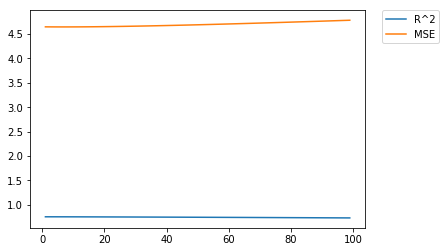

In [56]:
plt.plot(X_R2,y_R2,label = 'R^2')
plt.plot(X_MSE,y_MSE, label = "MSE")
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)

In [57]:
#LASSO
import numpy as np
alpha = np.arange(0,10,0.1)
lasso_df = pd.DataFrame()
lasso_r2 = {}
lasso_MSE = {}

for i in range(len(alpha)):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train, y_train)
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    
    lasso_df[float(alpha[i])] = lasso.coef_
    lasso_r2[float(alpha[i])] = lasso.score(X_train,y_train)
    lasso_MSE[float(alpha[i])] = np.sqrt(MSE(y_test,y_test_pred))


lasso_df = lasso_df.transpose()

/Users/masixin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/Users/masixin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/masixin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [58]:
X_R2 = list(lasso_r2.keys())
y_R2 = list(lasso_r2.values())

X_MSE = list(lasso_MSE.keys())
y_MSE = list(lasso_MSE.values())

print(X_R2)
print(y_R2)
print(X_MSE)
print(y_MSE)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9, 5.0, 5.1000000000000005, 5.2, 5.300000000000001, 5.4, 5.5, 5.6000000000000005, 5.7, 5.800000000000001, 5.9, 6.0, 6.1000000000000005, 6.2, 6.300000000000001, 6.4, 6.5, 6.6000000000000005, 6.7, 6.800000000000001, 6.9, 7.0, 7.1000000000000005, 7.2, 7.300000000000001, 7.4, 7.5, 7.6000000000000005, 7.7, 7.800000000000001, 7.9, 8.0, 8.1, 8.200000000000001, 8.3, 8.4, 8.5, 8.6, 8.700000000000001, 8.8, 8.9, 9.0, 9.1, 9.200000000000001, 9.3, 9.4, 9.5, 9.600000000000001, 9.700000000000

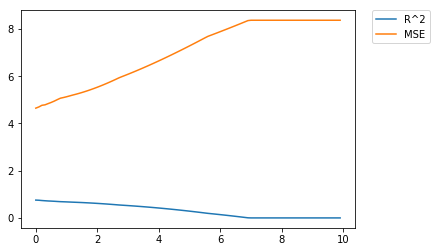

In [59]:
plt.plot(X_R2,y_R2,label = 'R^2')
plt.plot(X_MSE,y_MSE, label = "MSE")

plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)

In [63]:
import xlrd
df2=xlrd.open_workbook("/Users/masixin/Documents/msfe/ie598/housing.xlsx")

In [75]:
df_names = list(df2.columns)
cols = df_names
df2 = df.dropna()
df2.head()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.038327,0.592379,0.655174,0.119839,0.652477,0.984323,0.206738,0.374650,0.463350,0.333610,...,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.225022,0.983103,0.803619,0.836315,0.163104,0.637497,0.008760,0.631190,0.207978,0.880357,...,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.423233,0.375808,0.271293,0.729824,0.886744,0.043703,0.457700,0.862450,0.901924,0.062488,...,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.743370,0.929103,0.589894,0.644012,0.110490,0.774604,0.306483,0.880599,0.630401,0.928894,...,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.378623,0.786609,0.712752,0.110274,0.762133,0.030069,0.316631,0.667073,0.426443,0.400557,...,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


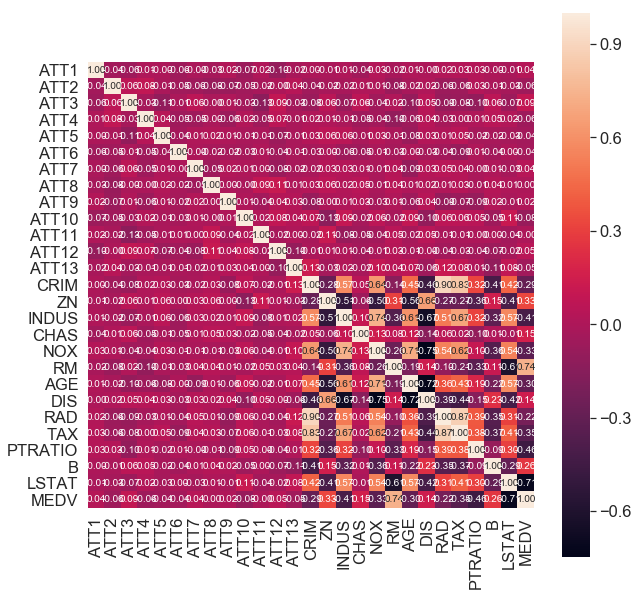

In [77]:
cm = np.corrcoef(df2.iloc[:,:].values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

In [78]:
print("My name is {Sixin Ma}")
print("My NetID is: {sixinma2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Sixin Ma}
My NetID is: {sixinma2}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
